In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/rohanmittal149/Solar-Radiation-Prediction/Major/SolarDelhi.csv', index_col = 0)

In [83]:
data.head()

,YEAR,MO,DY,PRECTOT,QV2M,PS,TS,KT,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,Date
0,1986,1,1,0.0,0.003886,99.11,11.85,0.68,3.97,6.50,1-1-1986
1,1986,1,1,0.0,0.003804,99.05,11.48,0.68,3.97,6.50,1-1-1986
2,1986,1,2,0.0,0.003462,99.13,11.86,0.76,4.42,6.36,2-1-1986
3,1986,1,2,0.0,0.003457,99.06,12.04,0.76,4.42,6.36,2-1-1986
4,1986,1,3,0.0,0.002913,99.31,10.09,0.73,4.29,6.50,3-1-1986


In [0]:
data.drop(['YEAR','DY','MO'], axis = 1, inplace =True)

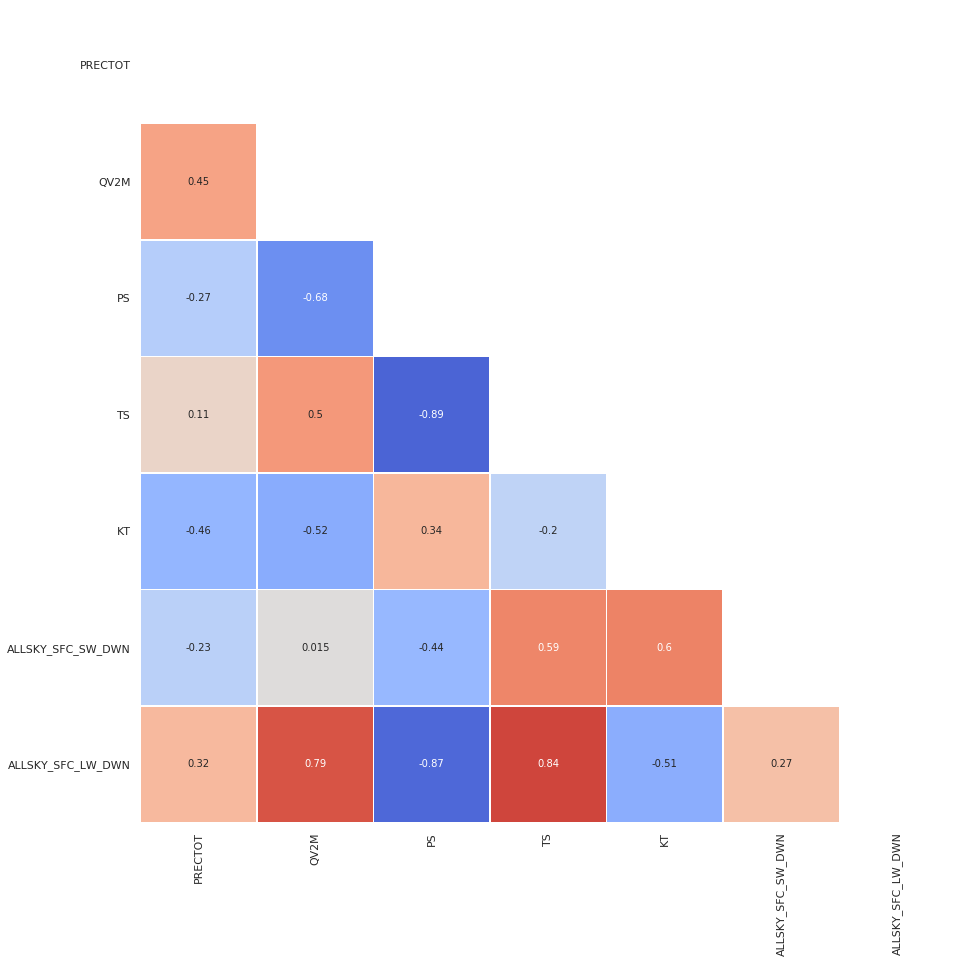

In [85]:
import numpy as np # linear algebra
from scipy import stats # statistics
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting tools
import seaborn as sns # advanced plotting tools
sns.set(style="white")
%matplotlib inline
def corrPairs(df):
    #Pairwise correlation matrix
    corr = df.corr() # Compute the correlation matrix
    mask = np.zeros_like(corr, dtype=np.bool) # make mask
    mask[np.triu_indices_from(mask)] = True # mask upper triangle
    sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.3, annot=True, cbar=False)

#data['WeekOfYear'] = data.index.Date # add week to view correlation

plt.figure(figsize=(15,15))
corrPairs(data)

In [86]:
dataset = data.iloc[:, :-1]
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = int(len(dataset)) - train_size
train = dataset.iloc[0:train_size,:] 
test = dataset.iloc[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, :])
    return np.array(X), np.array(Y)
    
look_back = 50
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)

TypeError: ignored